# Regression

© 2016 STREAMBRIGHT DATA LLC, ALL RIGHTS RESERVED

Building prediction models with multivariable regression methods.

## Ordinary Least Squares

Regression word first by Galton (1822-1911): estimate the height of childs based on height of fathers.

![regression](../files/0801_regression.jpg "Regresison")

## Regression example on toy data

Dataset from sci kit learn - Boston Housing data

In [49]:
from sklearn.datasets import load_boston
boston = load_boston()
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [50]:
import pandas as pd
import numpy as np
data = pd.DataFrame(data=np.c_[boston['data'], boston['target']],
                      columns=list(boston.feature_names) + ['MEDV'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [51]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Correlation matrix of the data

Correlation measures dependence between 2 features.
* Between -1 and 1
* -1: deterministic negative relationship
* 1: deterministic positive relationship
* 0: no correlation

![correlation](../files/0802_corr.svg "Correlation")

![correlation_types](../files/0803_corr-types.png "Types of Correlation")

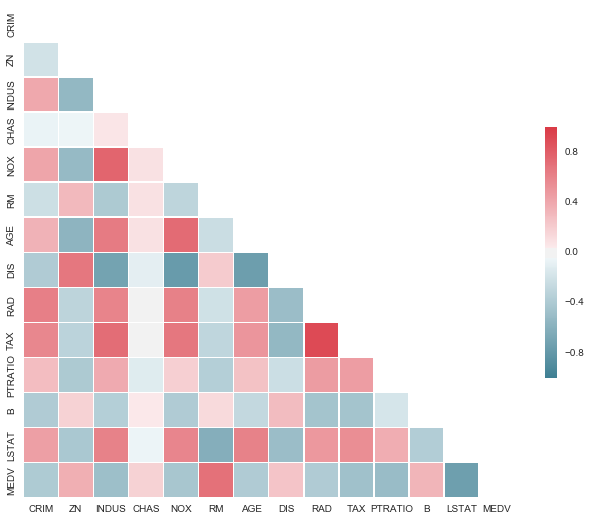

In [52]:
from string import letters
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

#### Correlation between the prices and size of the houses

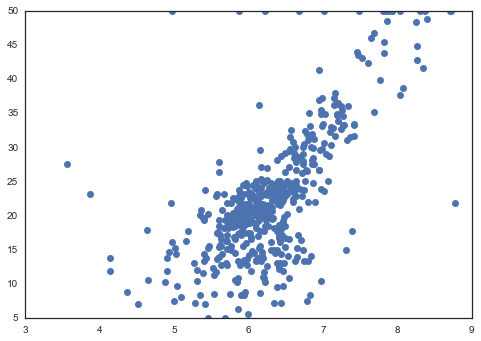

In [53]:
plt.plot(data.RM, data.MEDV, marker='o', linestyle='')
plt.show()

In [54]:
print np.corrcoef(data.RM, data.MEDV)

[[ 1.          0.69535995]
 [ 0.69535995  1.        ]]


#### Correlation between age of buildings and distance from employment centers of the city

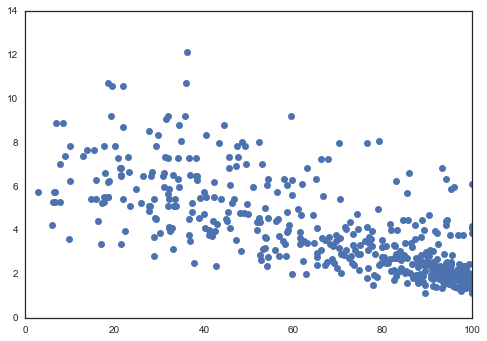

In [55]:
plt.plot(data.AGE, data.DIS, marker='o', linestyle='')
plt.show()

In [56]:
print np.corrcoef(data.DIS, data.AGE)

[[ 1.         -0.74788054]
 [-0.74788054  1.        ]]


### Fitting our first regression model

In [57]:
X = data[['RM']]
y = data[['MEDV']]

In [58]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Regression coefficient

In [59]:
print regr.intercept_
print "Coefficients: \n", regr.coef_

[-34.67062078]
Coefficients: 
[[ 9.10210898]]


1 Unit of change in the independent variable indicates 1 unit of change in the dependent variable.

If we add 1 more room then the price will go up by 9 102 USD (remember, we are in '70s).

### Measuring the explanation power of our fitting

![R2](../files/0802_R-sqared.png "R2")

Residual sum of squares: 43.60055
Total sum of squares: 84.41956
Variance score (1 is perfect prediction): 0.48353


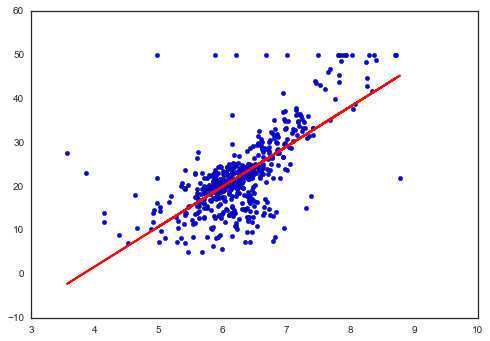

In [60]:
print("Residual sum of squares: %.5f"
      % np.mean((regr.predict(X) - y) ** 2))
print("Total sum of squares: %.5f" 
     % np.mean((y - np.mean(y)) ** 2))
print('Variance score (1 is perfect prediction): %.5f' % regr.score(X, y))

# Plot outputs
plt.scatter(X, y)
plt.plot(X, regr.predict(X), color='red', linewidth=2)
plt.show()

Checking it manually:

In [61]:
SSE = np.mean((regr.predict(X) - y) ** 2)
SST = np.mean((y - np.mean(y)) ** 2)
print (1 - SSE / SST)

MEDV    0.483525
dtype: float64


### Fitting a multivariate regression model

![multivariate_regr](../files/0804_mult-reg.png "Multivariate Regression")

First, we will use all the features we have.

In [62]:
X = data.drop('MEDV', axis=1)
y = data[["MEDV"]]

from sklearn.cross_validation import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

regr = linear_model.LinearRegression(normalize=False)
scores = cross_val_score(regr, X_train, y_train, cv=10)

Fitting and model building is the same like any calssification model.

Let see the scores for the model (R^2):

In [63]:
print "Scores: ", scores
print "Avg score: %.2f" % scores.mean()
print "Score std: %.2f" % scores.std()

Scores:  [ 0.76925765  0.76542448  0.56945729  0.59900341  0.72465784  0.8517482
  0.45693243  0.8371829   0.8037232   0.79482693]
Avg score: 0.72
Score std: 0.12


The deviation between model scores are much higher than in the case of our classification models.

Check the R^2 score for the test data and also print out all the coefficients.

In [64]:
regr.fit(X_train, y_train)
print('Variance score : %.5f' % regr.score(X_test, y_test))
pd.DataFrame(regr.coef_, columns=boston.feature_names)

Variance score : 0.63536


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.11687,0.043994,-0.005348,2.394554,-15.629837,3.761455,-0.00695,-1.435205,0.239756,-0.011294,-0.986626,0.008557,-0.500029


### Selecting relevant features

Not all features made equal for sure. There are features in the model which do not add any value to the prediction. They are not significant. How can we tell?

It is easier to tell if we calculate the standardized regression coefficients.

In [65]:
X = data.drop('MEDV', axis=1)
y = data[["MEDV"]]

from sklearn import preprocessing
X_stand = preprocessing.scale(X)

from sklearn.cross_validation import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_stand, y, train_size=0.75, test_size=0.25, random_state=0)

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, X_train, y_train, cv=10)

In [66]:
regr.fit(X_train, y_train)
pd.DataFrame(regr.coef_, columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-1.003709,1.025032,-0.036653,0.607601,-1.809359,2.64025,-0.195443,-3.019137,2.085553,-1.901531,-2.13388,0.780426,-3.567211


A standardized coefficient tells how many standard deviations a dependent variable will change, per standard deviation increase in the predictor variable - all the other variables keeping constant.

RM: 1 standard deviation change in RM will increse MEDV by 2.64 standard deviations.

### A really short intro to F Tests

The hypotheses for the F-test of the significance of coefficients:
* Null hypothesis: The coefficient is not significantly different from 0.
* Alternative hypothesis: The coefficient if significantly different than zero.

In [67]:
import statsmodels.formula.api as sm
import scipy, scipy.stats
X_train = np.append(X_train, np.ones(len(X_train))[...,None], axis=1)

model = sm.OLS( y_train, X_train ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     93.86
Date:                Wed, 27 Jul 2016   Prob (F-statistic):          1.00e-107
Time:                        23:07:18   Log-Likelihood:                -1102.1
No. Observations:                 379   AIC:                             2232.
Df Residuals:                     365   BIC:                             2287.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -1.0037      0.320     -3.136      0.002        -1.633    -0.374
x2             1.0250      0.350      2.931      0.004         0.337     1.713
x3            -0.0367      0.457     -0.080      0.936        -0.936     0.863
x4             0.6076      0.244      2.490      0.013         0.128     1.088
x5            -1.8094      0.501     -3.608      0.000        -2.795    -0.823
x6             2.6402      0.331      7.966      0.000         1.988     3.292
x7            -0.1954      0.419     -0.466      0.641        -1.020     0.629
x8            -3.0191      0.472     -6.402      0.000        -3.947    -2.092
x9             2.0856      0.633      3.297      0.001         0.842     3.329
x10           -1.9015      0.684     -2.778      0.006        -3.248    -0.556
x11           -2.1339      0.314     -6.800      0.000        -2.751    -1.517
x12            0.7804      0.277      2.819      0.005         0.236     1.325
x13           -3.5672      0.410     -8.691      0.000        -4.374    -2.760
const         22.4082      0.233     95.995      0.000        21.949    22.867
==============================================================================
Omnibus:                      141.705   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              664.042
Skew:                           1.550   Prob(JB):                    6.38e-145
Kurtosis:                       8.696   Cond. No.                         9.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
pd.DataFrame(data.columns, index=range(1,15))

,0
1,CRIM
2,ZN
3,INDUS
4,CHAS
5,NOX
6,RM
7,AGE
8,DIS
9,RAD
10,TAX


According to the significant tests we will build a model with only the significant features. We will drop:
- `INDUS`
- `AGE`

### Building a model with reduced number of features

In [69]:
keepers = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_new = data[keepers]
y = data[["MEDV"]]

X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.75, test_size=0.25, random_state=0)

regr = linear_model.LinearRegression(normalize=False)
scores = cross_val_score(regr, X_train, y_train, cv=10)
print "Scores: ", scores
print "Avg score: %.3f" % scores.mean()
print "Score std: %.3f" % scores.std()

regr.fit(X_train, y_train)

Scores:  [ 0.77305541  0.77115192  0.57082822  0.6059172   0.73216383  0.85567918
  0.46865399  0.83722236  0.8042477   0.79667072]
Avg score: 0.722
Score std: 0.122


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Residual Plots

Your model isn’t always perfectly right, of course. When lets say, the prediction is off by 2; that difference, the 2, is called the residual, the bit that’s left when you subtract the predicted value from the observed value.

Residual = Observed – Predicted

The most useful way to plot the residuals is with your predicted values on the x-axis, and your residuals on the y-axis.

![resid](../files/0805_residplot.png "Residual Plot")

The plot should look like the one on the right side. Meaning the residuals:

* are pretty symmetrically distributed, tending to cluster towards the middle of the plot
* are clustered around the lower single digits of the y-axis (e.g., 0.5 or 1.5, not 30 or 150)
* in general there aren’t clear patterns.

![resid_struct1](../files/0806_resid_structure1.png "Structure in residuals")
![resid_struct2](../files/0807_resid_structure2.png "Structure in residuals")

These plots aren’t evenly distributed vertically, or they have an outlier, or they have a clear shape to them.

If you can detect a clear pattern or trend in your residuals, then your model has room for improvement.

But... does it matter?

> “Essentially, all models are wrong, but some are useful” - George Box

### Plot the standardized residuals of our model from before

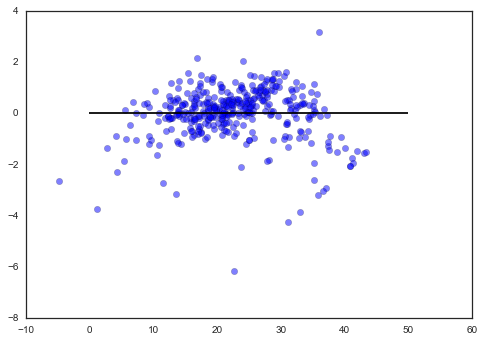

In [70]:
standard_resid = ((regr.predict(X_train) - y_train) - 
                  np.mean(regr.predict(X_train) - y_train)) / np.std(regr.predict(X_train) - y_train)

plt.scatter(regr.predict(X_train), standard_resid, c='b', s=40, alpha=.5)
plt.hlines(y=0, xmin=0, xmax=50)

We can observe a slight non-linearity in this model.

### Frequent explanations for structure in residual plots

* Y-axis Unbalanced: Transform variable (usually the dependent variable) or the model lacks an important variable
* X-axis Unbalanced: Transform variables (usually the independent variables) or the model lacks an important variable
* "Heteroscedasticity" (funnel shaped plot): needs to transform the variable or lacks a variable
* Plot indicates non-linearity: transform / include variables or build a non-linear model
* Outliers: delete the observations, transform the variable or assess the ourlier if it is important
* Large Y-axis Datapoints: again, transformation or new variables